
#  

# <center>Investigating the No-Show Appointments Dataset</center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Research Question 1</a></li>
<li><a href="#q2">Research Question 2</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project is based on Kaggle's [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments) dataset.
>It contains data for 14 independant variables for 110,527 medical appointments in Brazil. The dependent variable is a binary show or no-show. 

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy as sp
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
SEED = 7654

<a id='wrangling'></a>
## Data Wrangling

<ul>
<li><a href="#gp">General Properties of the Data</a></li>
<li><a href="#dt">Data types</a></li>
<li><a href="#dc">Data Cleaning</a></li>
<li><a href="#date">Datetime</a></li>
<li><a href="#gen">Gender</a></li>
<li><a href="#nh">Neighborhood</a></li>
<li><a href="#trim">Trim Data</a></li>
</ul>



<a id='wrangling'></a>
## General Properties of the Data
>This section consists of loading the data and doing some quick investigation to help determinne a course of action.

In [3]:
#Load the data and confirm size
raw_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

X = raw_df.drop(['No-show'], axis = 1)
y = raw_df['No-show']

print('raw:{}  X:{}  y:{}'.format(raw_df.shape, X.shape, y.shape))

raw:(110527, 14)  X:(110527, 13)  y:(110527,)


In [4]:
#Function to prevent output truncation and improve readability
from IPython.display import display

def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [5]:
# View of raw dataframe
display_all(raw_df.head(50).transpose())  # Display data in an easy to read format

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
PatientId,2.98725e+13,5.58998e+14,4.26296e+12,8.67951e+11,8.84119e+12,9.59851e+13,7.33688e+14,3.44983e+12,5.63947e+13,7.81246e+13,7.34536e+14,7.54295e+12,5.66655e+14,9.11395e+14,9.98847e+13,9.99484e+10,8.45744e+13,1.4795e+13,1.71354e+13,7.22329e+12,6.22257e+14,1.21548e+13,8.6323e+14,2.13754e+14,8.73486e+12,5.81937e+12,2.57879e+10,1.21548e+13,5.92617e+12,1.22578e+12,3.42816e+11,3.11285e+11,5.28836e+13,7.65352e+12,1.99998e+13,7.81626e+13,7.29846e+13,1.57813e+12,5.87332e+12,1.45562e+13,9.96868e+14,8.22432e+14,2.59654e+13,7.1559e+13,2.74165e+11,4.98238e+12,1.37944e+11,5.89458e+11,8.54542e+12,9.22356e+13
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,5630213,5620163,5634718,5636249,5633951,5620206,5633121,5633460,5621836,5640433,5626083,5628338,5616091,5634142,5641780,5624020,5641781,5628345,5642400,5642186,5628068,5628907,5637908,5616921,5637963,5637968,5637975,5637986,5609446,5639644,5635881,5633339,5632906,5641620,5635414,5635842,5615608,5633116,5618643,5534656
Gender,F,M,F,F,F,F,F,F,F,F,F,M,F,M,F,F,M,F,F,F,F,F,M,F,F,M,F,F,M,F,F,M,M,F,F,M,F,F,M,F,F,F,F,F,F,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z,2016-04-27T08:36:51Z,2016-04-27T15:05:12Z,2016-04-27T15:39:58Z,2016-04-29T08:02:16Z,2016-04-27T12:48:25Z,2016-04-27T14:58:11Z,2016-04-26T08:44:12Z,2016-04-28T11:33:51Z,2016-04-28T14:52:07Z,2016-04-28T10:06:24Z,2016-04-26T08:47:27Z,2016-04-28T08:51:47Z,2016-04-28T09:28:57Z,2016-04-26T10:54:18Z,2016-04-29T10:43:14Z,2016-04-27T07:51:14Z,2016-04-27T10:50:45Z,2016-04-25T13:29:16Z,2016-04-28T10:27:05Z,2016-04-29T14:19:19Z,2016-04-26T15:04:17Z,2016-04-29T14:19:42Z,2016-04-27T10:51:45Z,2016-04-29T15:48:02Z,2016-04-29T15:16:29Z,2016-04-27T10:24:52Z,2016-04-27T12:07:14Z,2016-04-29T07:30:27Z,2016-04-25T15:01:04Z,2016-04-29T07:34:30Z,2016-04-29T07:34:42Z,2016-04-29T07:35:19Z,2016-04-29T07:35:56Z,2016-04-20T15:54:18Z,2016-04-29T09:21:13Z,2016-04-28T14:14:16Z,2016-04-28T09:20:36Z,2016-04-28T08:34:54Z,2016-04-29T14:02:16Z,2016-04-28T13:27:27Z,2016-04-28T14:11:24Z,2016-04-25T12:44:36Z,2016-04-28T08:51:26Z,2016-04-26T07:19:49Z,2016-03-31T17:11:17Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56,76,23,39,21,19,30,29,22,28,54,15,50,40,30,46,30,4,13,46,65,46,45,4,51,32,46,12,61,38,79,18,63,64,85,59,55,71,50,49,78,31,58,39,58,27
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,CONQUISTA,NOVA PALESTINA,DA PENHA,NOVA PALESTINA,CONQUISTA,CONQUISTA,CONQUISTA,TABUAZEIRO,CONQUISTA,BENTO FERREIRA,CONQUISTA,SÃO PEDRO,SANTA MARTHA,NOVA PALESTINA,NOVA PALESTINA,SÃO CRISTÓVÃO,SÃO CRIS

In [6]:
#Print data types
raw_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

<a id='dt'></a>
### Data types
>There are several columns of object data type. These columns will need to be explored to determine the appropriate course of action to convert them to a more usable data type.
>The numeric data will be checked for erroneous and null data.


In [7]:
#Check gender and no_show objects for incorrect values
raw_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
raw_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#Check Neighbourhood object to help determine what action is needed 
len(raw_df['Neighbourhood'].unique())

81

In [10]:
#Descriptive statistics of raw dataframe
raw_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='dc'></a>
### Data Cleaning
>The first problem to be checked is the min age of -1
>
>Next will be a check for null values

In [11]:
#explore Age of -1
raw_df.loc[raw_df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#drop row 99832, the age is incorect 
X.drop([99832], axis = 0, inplace = True)
X.reset_index(inplace = True, drop = True)

y.drop([99832], axis = 0, inplace = True)
print(X.shape, y.shape)

(110526, 13) (110526,)


In [13]:
#Display data for columns with nulls

nulls = np.sum(raw_df.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = raw_df.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are {} columns with missing values".format(len(nullcols)))

Empty DataFrame
Columns: [0, 1]
Index: []
There are 0 columns with missing values


<a id='date'></a>
### Datetime
>The date columns, ScheduledDay and AppointmentDay, will be converted into seperate columns for month, day, year, day of week, week of year, day of year, and hour. This will aid in finding any correlation between the datetime and no-shows.
>This will also convert the columns from objects to numeric

In [14]:
#Convert date objects to datetime and seperate into date and time

#Scheduled date
X['schDate_Month'] =   pd.DatetimeIndex(X['ScheduledDay']).month
X['schDate_Day'] =     pd.DatetimeIndex(X['ScheduledDay']).day
X['schDate_Year'] =  pd.DatetimeIndex(X['ScheduledDay']).year
X['schDate_Weekday'] = pd.DatetimeIndex(X['ScheduledDay']).dayofweek
X['schDate_wkYear'] =  pd.DatetimeIndex(X['ScheduledDay']).weekofyear
X['schDate_dayYear'] =  pd.DatetimeIndex(X['ScheduledDay']).dayofyear
#Scheduled Time
X['sch_Time'] =        pd.DatetimeIndex(X['ScheduledDay']).hour

#Appointment date
X['appDate_Month'] =   pd.DatetimeIndex(X['AppointmentDay']).month
X['appDate_Day'] =     pd.DatetimeIndex(X['AppointmentDay']).day
X['appDate_Year'] =  pd.DatetimeIndex(X['AppointmentDay']).year
X['appDate_Weekday'] = pd.DatetimeIndex(X['AppointmentDay']).dayofweek
X['appDate_wkYear'] =  pd.DatetimeIndex(X['AppointmentDay']).weekofyear
X['appDate_dayYear'] =  pd.DatetimeIndex(X['AppointmentDay']).dayofyear


display_all(X.head(50).transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
PatientId,2.98725e+13,5.58998e+14,4.26296e+12,8.67951e+11,8.84119e+12,9.59851e+13,7.33688e+14,3.44983e+12,5.63947e+13,7.81246e+13,7.34536e+14,7.54295e+12,5.66655e+14,9.11395e+14,9.98847e+13,9.99484e+10,8.45744e+13,1.4795e+13,1.71354e+13,7.22329e+12,6.22257e+14,1.21548e+13,8.6323e+14,2.13754e+14,8.73486e+12,5.81937e+12,2.57879e+10,1.21548e+13,5.92617e+12,1.22578e+12,3.42816e+11,3.11285e+11,5.28836e+13,7.65352e+12,1.99998e+13,7.81626e+13,7.29846e+13,1.57813e+12,5.87332e+12,1.45562e+13,9.96868e+14,8.22432e+14,2.59654e+13,7.1559e+13,2.74165e+11,4.98238e+12,1.37944e+11,5.89458e+11,8.54542e+12,9.22356e+13
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,5630213,5620163,5634718,5636249,5633951,5620206,5633121,5633460,5621836,5640433,5626083,5628338,5616091,5634142,5641780,5624020,5641781,5628345,5642400,5642186,5628068,5628907,5637908,5616921,5637963,5637968,5637975,5637986,5609446,5639644,5635881,5633339,5632906,5641620,5635414,5635842,5615608,5633116,5618643,5534656
Gender,F,M,F,F,F,F,F,F,F,F,F,M,F,M,F,F,M,F,F,F,F,F,M,F,F,M,F,F,M,F,F,M,M,F,F,M,F,F,M,F,F,F,F,F,F,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z,2016-04-27T08:36:51Z,2016-04-27T15:05:12Z,2016-04-27T15:39:58Z,2016-04-29T08:02:16Z,2016-04-27T12:48:25Z,2016-04-27T14:58:11Z,2016-04-26T08:44:12Z,2016-04-28T11:33:51Z,2016-04-28T14:52:07Z,2016-04-28T10:06:24Z,2016-04-26T08:47:27Z,2016-04-28T08:51:47Z,2016-04-28T09:28:57Z,2016-04-26T10:54:18Z,2016-04-29T10:43:14Z,2016-04-27T07:51:14Z,2016-04-27T10:50:45Z,2016-04-25T13:29:16Z,2016-04-28T10:27:05Z,2016-04-29T14:19:19Z,2016-04-26T15:04:17Z,2016-04-29T14:19:42Z,2016-04-27T10:51:45Z,2016-04-29T15:48:02Z,2016-04-29T15:16:29Z,2016-04-27T10:24:52Z,2016-04-27T12:07:14Z,2016-04-29T07:30:27Z,2016-04-25T15:01:04Z,2016-04-29T07:34:30Z,2016-04-29T07:34:42Z,2016-04-29T07:35:19Z,2016-04-29T07:35:56Z,2016-04-20T15:54:18Z,2016-04-29T09:21:13Z,2016-04-28T14:14:16Z,2016-04-28T09:20:36Z,2016-04-28T08:34:54Z,2016-04-29T14:02:16Z,2016-04-28T13:27:27Z,2016-04-28T14:11:24Z,2016-04-25T12:44:36Z,2016-04-28T08:51:26Z,2016-04-26T07:19:49Z,2016-03-31T17:11:17Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56,76,23,39,21,19,30,29,22,28,54,15,50,40,30,46,30,4,13,46,65,46,45,4,51,32,46,12,61,38,79,18,63,64,85,59,55,71,50,49,78,31,58,39,58,27
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,CONQUISTA,NOVA PALESTINA,DA PENHA,NOVA PALESTINA,CONQUISTA,CONQUISTA,CONQUISTA,TABUAZEIRO,CONQUISTA,BENTO FERREIRA,CONQUISTA,SÃO PEDRO,SANTA MARTHA,NOVA PALESTINA,NOVA PALESTINA,SÃO CRISTÓVÃO,SÃO CRIS

In [15]:
#drop old datetime columns
X.drop(['ScheduledDay'], axis = 1, inplace = True)
X.drop(['AppointmentDay'], axis = 1, inplace = True)
X.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
schDate_Month        int64
schDate_Day          int64
schDate_Year         int64
schDate_Weekday      int64
schDate_wkYear       int64
schDate_dayYear      int64
sch_Time             int64
appDate_Month        int64
appDate_Day          int64
appDate_Year         int64
appDate_Weekday      int64
appDate_wkYear       int64
appDate_dayYear      int64
dtype: object

In [16]:
#Descriptive statistics for new columns
display_all(X.describe())

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,schDate_Month,schDate_Day,schDate_Year,schDate_Weekday,schDate_wkYear,schDate_dayYear,sch_Time,appDate_Month,appDate_Day,appDate_Year,appDate_Weekday,appDate_wkYear,appDate_dayYear
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000,110526.000000,110526.00000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,4.823860,14.252303,2015.999439,1.851971,18.744621,130.060954,10.774542,5.210041,12.499457,2016.0,1.858260,20.168820,140.04000
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.715795,9.345638,0.023678,1.378515,2.802764,19.460610,3.216192,0.473776,9.056502,0.0,1.371667,1.775235,12.18926
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,0.000000,1.000000,4.000000,6.000000,4.000000,1.000000,2016.0,0.000000,17.000000,120.00000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,2016.000000,1.000000,17.000000,120.000000,8.000000,5.000000,5.000000,2016.0,1.000000,19.000000,130.00000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,2016.000000,2.000000,19.000000,131.000000,10.000000,5.000000,10.000000,2016.0,2.000000,20.000000,139.00000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,22.000000,2016.000000,3.000000,20.000000,141.000000,13.000000,5.000000,19.000000,2016.0,3.000000,22.000000,152.00000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,31.000000,2016.000000,5.000000,51.000000,349.000000,21.000000,6.000000,31.000000,2016.0,5.000000,23.000000,160.00000


In [17]:
#Year columns look strange, further investigation is needed
X['schDate_Year'].unique()

array([2016, 2015], dtype=int64)

In [18]:
X['appDate_Year'].unique()

array([2016], dtype=int64)

In [19]:
#2015
yr_index = X.loc[ X['schDate_Year'] == 2015].index
per = round( (len(yr_index)/len(X))*100, 2 )
print('Count:{}  percent of data:{}%'.format(len(yr_index), per))

Count:62  percent of data:0.06%


In [20]:
#Appointments made in 2015 are a small percentage of data so they will be dropped as outliers
X.drop(yr_index, axis = 0, inplace = True)
X.reset_index(inplace = True, drop = True)

y.drop(yr_index, axis = 0, inplace = True)
y.reset_index(inplace = True, drop = True)

print(X.shape, y.shape)

(110464, 24) (110464,)


In [21]:
#Drop year columns, all years are now 2016 
X.drop(['schDate_Year', 'appDate_Year'], axis = 1, inplace = True)
X.shape

(110464, 22)

<a id='gen'></a>
### Gender
>Create dummy columns for gender to simplify analysis and convert from object data type

In [22]:
#Convert gender into dummy columns F and M
dummies = pd.get_dummies(X['Gender'])
X = pd.concat([X, dummies], axis =1)
X.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,schDate_wkYear,schDate_dayYear,sch_Time,appDate_Month,appDate_Day,appDate_Weekday,appDate_wkYear,appDate_dayYear,F,M
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,...,17,120,18,4,29,4,17,120,1,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,...,17,120,16,4,29,4,17,120,0,1
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,...,17,120,16,4,29,4,17,120,1,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,...,17,120,17,4,29,4,17,120,1,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,...,17,120,16,4,29,4,17,120,1,0


In [23]:
#Drop original Gender column
X.drop(['Gender'], axis = 1, inplace = True)
X.shape

(110464, 23)

In [24]:
#Check data types for new columns
X.dtypes

PatientId          float64
AppointmentID        int64
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
schDate_Month        int64
schDate_Day          int64
schDate_Weekday      int64
schDate_wkYear       int64
schDate_dayYear      int64
sch_Time             int64
appDate_Month        int64
appDate_Day          int64
appDate_Weekday      int64
appDate_wkYear       int64
appDate_dayYear      int64
F                    uint8
M                    uint8
dtype: object

<a id='nh'></a>
### Neighborhood
>Neighborhood is the last object column. Since there are 81 unique values, encoding the names into numeric values is the best option.
>
>Scikit-learn's LabelEncoder is used to convert the neighborhood object to a numeric format

In [25]:
#Encoder
cat = LabelEncoder() #Encoder
new_neighbor = pd.DataFrame(cat.fit_transform(X['Neighbourhood']), columns = ['Neighborhood'])
X = pd.concat([X, new_neighbor], axis =1)
X.head()

,PatientId,AppointmentID,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,schDate_dayYear,sch_Time,appDate_Month,appDate_Day,appDate_Weekday,appDate_wkYear,appDate_dayYear,F,M,Neighborhood
0,2.987250e+13,5642903,62,JARDIM DA PENHA,0,1,0,0,0,0,...,120,18,4,29,4,17,120,1,0,39
1,5.589978e+14,5642503,56,JARDIM DA PENHA,0,0,0,0,0,0,...,120,16,4,29,4,17,120,0,1,39
2,4.262962e+12,5642549,62,MATA DA PRAIA,0,0,0,0,0,0,...,120,16,4,29,4,17,120,1,0,45
3,8.679512e+11,5642828,8,PONTAL DE CAMBURI,0,0,0,0,0,0,...,120,17,4,29,4,17,120,1,0,54
4,8.841186e+12,5642494,56,JARDIM DA PENHA,0,1,1,0,0,0,...,120,16,4,29,4,17,120,1,0,39


In [26]:
#Drop original Neighbourhood
X.drop(['Neighbourhood'], axis = 1, inplace = True)
X.shape

(110464, 23)

In [27]:
#objects are gone!
X.dtypes

PatientId          float64
AppointmentID        int64
Age                  int64
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
schDate_Month        int64
schDate_Day          int64
schDate_Weekday      int64
schDate_wkYear       int64
schDate_dayYear      int64
sch_Time             int64
appDate_Month        int64
appDate_Day          int64
appDate_Weekday      int64
appDate_wkYear       int64
appDate_dayYear      int64
F                    uint8
M                    uint8
Neighborhood         int32
dtype: object

<a id='trim'></a>
### Trim Data
>Drop columns that do not contain any valuable information and check for duplicate rows 

In [28]:
#Check patient id
len(X['PatientId'].unique())

62253

In [29]:
#62253 is too many unique identifiers to be of any value, column is dropped
X.drop(['PatientId'], axis = 1, inplace = True)
X.shape

(110464, 22)

In [30]:
#check appointment ID
len(X['AppointmentID'].unique())

110464

In [31]:
#All values are unique. Drop
X.drop(['AppointmentID'], axis = 1, inplace = True)
X.shape

(110464, 21)

In [32]:
display_all(X.describe())

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,schDate_Month,schDate_Day,schDate_Weekday,schDate_wkYear,schDate_dayYear,sch_Time,appDate_Month,appDate_Day,appDate_Weekday,appDate_wkYear,appDate_dayYear,F,M,Neighborhood
count,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000
mean,37.074558,0.098276,0.196915,0.071824,0.030417,0.022224,0.320819,4.819842,14.255160,1.852576,18.727006,129.941619,10.773899,5.209933,12.500751,1.858017,20.168562,140.037949,0.649931,0.350069,41.729097
std,23.105415,0.297689,0.397669,0.258198,0.171733,0.161481,0.466794,0.695594,9.347233,1.378610,2.703050,18.802357,3.216535,0.473745,9.056883,1.371886,1.775290,12.189269,0.476993,0.476993,22.363089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,6.000000,4.000000,1.000000,0.000000,17.000000,120.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,1.000000,17.000000,120.000000,8.000000,5.000000,5.000000,1.000000,19.000000,130.000000,0.000000,0.000000,26.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,2.000000,19.000000,131.000000,10.000000,5.000000,10.000000,2.000000,20.000000,139.000000,1.000000,0.000000,40.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,22.000000,3.000000,20.000000,141.000000,13.000000,5.000000,19.000000,3.000000,22.000000,152.000000,1.000000,1.000000,60.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,31.000000,5.000000,23.000000,160.000000,21.000000,6.000000,31.000000,5.000000,23.000000,160.000000,1.000000,1.000000,80.000000


In [33]:
#Check for duplicates and drop any duplicate rows

dup = X.duplicated()
dup_index = dup.loc[dup == True].index

X.drop(dup_index, axis = 0, inplace = True)
X.reset_index(inplace = True, drop = True)

y.drop(dup_index, axis = 0, inplace = True)
y.reset_index(inplace = True, drop = True)

print('There were ',len(dup_index),' duplicates removed. The new shape is:', X.shape, y.shape)

There were  3434  duplicates removed. The new shape is: (107030, 21) (107030,)


In [34]:
#Summary of cleaned df
display_all(X.describe())

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,schDate_Month,schDate_Day,schDate_Weekday,schDate_wkYear,schDate_dayYear,sch_Time,appDate_Month,appDate_Day,appDate_Weekday,appDate_wkYear,appDate_dayYear,F,M,Neighborhood
count,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000,107030.000000
mean,37.301168,0.098711,0.199103,0.072690,0.030337,0.022134,0.328898,4.817575,14.280576,1.852228,18.720854,129.898206,10.775951,5.211034,12.493796,1.856685,20.172671,140.065384,0.651509,0.348491,41.726731
std,23.058814,0.298275,0.399328,0.259628,0.171514,0.161008,0.469815,0.696205,9.350119,1.378594,2.706680,18.828141,3.219646,0.474921,9.078983,1.370334,1.779210,12.215969,0.476495,0.476495,22.349756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,6.000000,4.000000,1.000000,0.000000,17.000000,120.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,1.000000,17.000000,120.000000,8.000000,5.000000,5.000000,1.000000,19.000000,130.000000,0.000000,0.000000,26.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,2.000000,19.000000,131.000000,10.000000,5.000000,10.000000,2.000000,20.000000,139.000000,1.000000,0.000000,40.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,22.000000,3.000000,20.000000,141.000000,13.000000,5.000000,19.000000,3.000000,22.000000,152.000000,1.000000,1.000000,60.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,31.000000,5.000000,23.000000,160.000000,21.000000,6.000000,31.000000,5.000000,23.000000,160.000000,1.000000,1.000000,80.000000


<a id='eda'></a>
## Exploratory Data Analysis
>Visual exploration of select columns
>

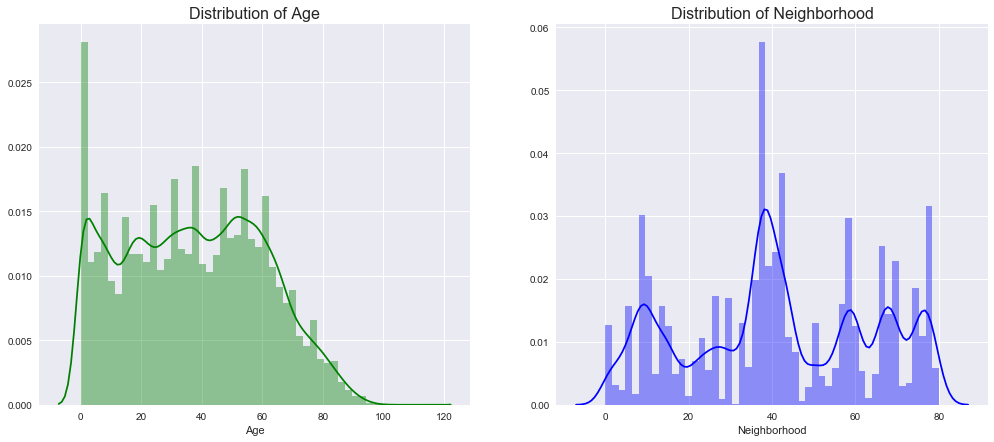

In [35]:
#Check Continuous columns for interesting dat
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1, figsize=(17,7))
ax1.set_title('Distribution of Age', fontdict = {'fontsize' : 16})
ax2.set_title('Distribution of Neighborhood', fontdict = {'fontsize' : 16})
sns.distplot(X['Age'], color = 'Green', ax = ax1)
sns.distplot(X['Neighborhood'], color = 'Blue', ax = ax2)

[Text(0, 0.5, ''), Text(0.5, 0, 'Day of Year')]

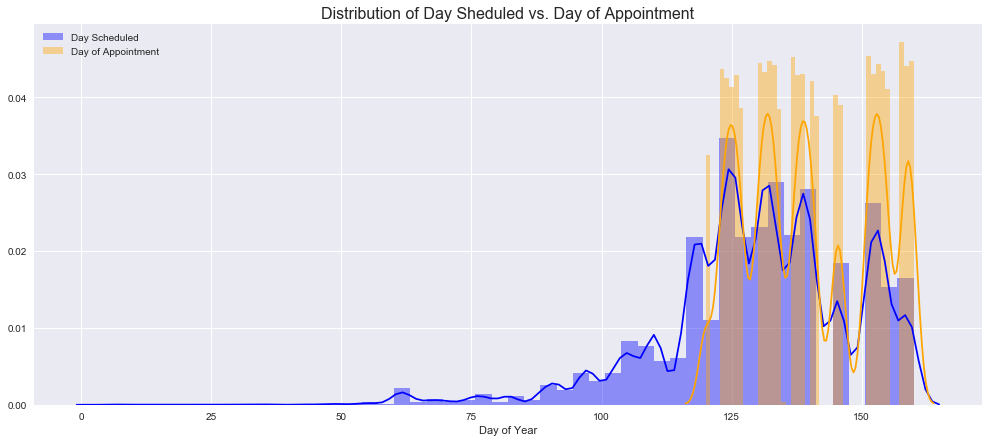

In [36]:
#Check Continuous columns day scheduled vs day of appointment
fig, ((ax1)) = plt.subplots(ncols=1, nrows=1, figsize=(17,7))
ax1.set_title('Distribution of Day Sheduled vs. Day of Appointment', fontdict = {'fontsize' : 16})
sns.distplot(X['schDate_dayYear'], color = 'Blue', ax = ax1)
sns.distplot(X['appDate_dayYear'], color = 'Orange', ax = ax1)
plt.legend(loc='upper left', labels=['Day Scheduled', 'Day of Appointment'])
ax1.set(xlabel='Day of Year', ylabel='')

<a id='q1'></a>
##  Research Question 1: 
#### Does the time between the day the appointment is made and the day of the appointment affect the rate of show/no-show?
>The chart above comparing the day-scheduled to the day of appointment shows a variance between the day-scheduled and the day of the appointment.
>Some of the appointments were scheduled far in advance of the appointment.
>The Chi-square test of independence of variables will be used to determine if the time, in days, affects the rate of no-shows.
>> - The null hypothesis is that the time, in days, does not affect the rate of no-shows
>>
>>    χ² <= Critical Value and p-value >= α
>>
>>
>> - The alternative hypothesis is the time, in days, does affect the rate of no-shows
>>
>>    χ² > Critical Value and p-value < α
>>
>>χ² : Chi-squared test statistic
>>
>>α  : Alpha

>
> <a href="#f1">Findings</a>


In [37]:
#New Dataframe with the difference, in days, between scheduled day and appointment day

diff = pd.DataFrame()
diff['diff'] =  X['appDate_dayYear']- X['schDate_dayYear']
X['difference'] = diff['diff'] # add to X for future use
diff_df = pd.concat([diff['diff'], y], axis = 1)

nShow = diff_df.loc[diff_df['No-show'] == 'Yes']
show = diff_df.loc[diff_df['No-show'] == 'No']

no_show_same_day = nShow.loc[nShow['diff'] == 0]
show_same_day = show.loc[show['diff'] == 0]
tot_same_day = diff_df.loc[diff_df['diff'] == 0]
day_before = diff_df.loc[diff_df['diff'] < -0]

<a id='nsg'></a>
#### No-shows and shows distibution by days between schedule and appointment days

[Text(0, 0.5, ''), Text(0.5, 0, 'Days')]

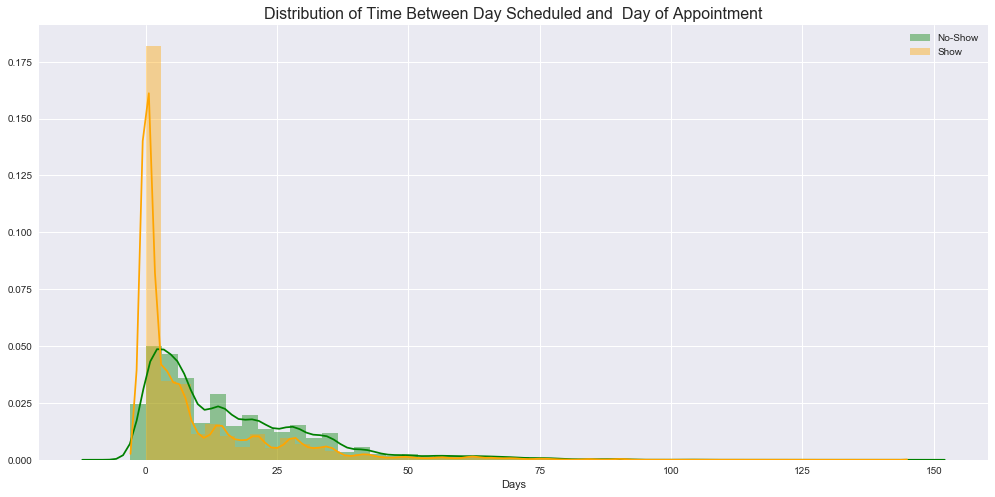

In [38]:
#Difference between Schedule day Appointment day
fig, (ax1) = plt.subplots(ncols=1, figsize=(17,8))
ax1.set_title('Distribution of Time Between Day Scheduled and  Day of Appointment', fontdict = {'fontsize' : 16})

sns.distplot(nShow['diff'], color = 'Green', ax = ax1)
sns.distplot(show['diff'], color = 'Orange', ax = ax1)
plt.legend(loc='upper right', labels=['No-Show', 'Show'])
ax1.set(xlabel='Days', ylabel='')

####  The graph above shows some appointments were scheduled AFTER the appointment. This is erroneous data and will be
#### dropped. Another interesting feature is the large percentage of show data for same day appointments.

In [39]:
#drop erroneous data
db_index = day_before.index

X.drop(db_index, axis = 0, inplace = True)
X.reset_index(inplace = True, drop = True)

y.drop(db_index, axis = 0, inplace = True)
y.reset_index(inplace = True, drop = True)

print(X.shape, y.shape)

(107025, 22) (107025,)


In [40]:
#new df  of the difference unique columns for yes/no and total count of values for yes/no
diff2 = pd.DataFrame()
diff2['diff'] =  X['appDate_dayYear']- X['schDate_dayYear']
d_bin = pd.get_dummies(y)
diff_df2 = pd.concat([diff2['diff'], d_bin], axis = 1)
diff_df2['Total'] =  diff_df2['Yes'] + diff_df2['No']

group_df = diff_df2.groupby(['diff'], as_index = False).sum()
group_df.tail(5)

,diff,No,Yes,Total
118,132,0.0,1.0,1.0
119,133,7.0,4.0,11.0
120,139,0.0,1.0,1.0
121,142,1.0,1.0,2.0
122,146,0.0,1.0,1.0


In [41]:
#Shape of new df
group_df.shape

(123, 4)

In [42]:
#Data for no-shows and shows for same day data
nShow2 = diff_df2.loc[diff_df2['Yes'] == 1]
show2 = diff_df2.loc[diff_df2['No'] == 1]

no_show_same_day2 = nShow2.loc[nShow2['diff'] == 0]
show_same_day2 = show2.loc[show2['diff'] == 0]
tot_same_day2 = diff_df2.loc[diff_df2['diff'] == 0]

no_show_greater = nShow2.loc[nShow2['diff'] > 0]
show_greater = show2.loc[show2['diff'] > 0]
tot_other = diff_df2.loc[diff_df2['diff'] > 0]


In [43]:
#percent of no shows same day
per_sd = round((len(show_same_day2) / len(diff2))*100, 1)
sd_percent = round((len(show_same_day2) / len(tot_same_day2))*100, 1)

per_sd_no = round((len(no_show_same_day2) / len(diff2))*100, 1)
sd_percent_no = round((len(no_show_same_day2) / len(tot_same_day2))*100, 1)

per_other_no = round((len(no_show_greater) / len(tot_other))*100, 1)
per_other_show = round((len(show_greater) / len(tot_other))*100, 1)


print('{}% of shows scheduled the appointment the same day'.format(per_sd))
print('{}% of same day appointments showed up'.format(sd_percent))
print('{}% of all other days showed up'.format(per_other_show))

print('\n{}% of no-shows scheduled the appointment the same day'.format(per_sd_no))
print('{}% of same day appointments were no-shows'.format(sd_percent_no))
print('{}% of all other days were no-shows'.format(per_other_no))


32.9% of shows scheduled the appointment the same day
95.7% of same day appointments showed up
71.7% of all other days showed up

1.5% of no-shows scheduled the appointment the same day
4.3% of same day appointments were no-shows
28.3% of all other days were no-shows


In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

no_show_sd = len(no_show_same_day2)
show_sd = len(show_same_day2)
total_sd = len(tot_same_day2)

no_show_other = len(no_show_greater)
show_other = len(show_greater)
total_other = len(tot_other)

table = np.array([[no_show_other, show_other, total_other], [no_show_sd, show_sd, total_sd]])
prob = 0.95
alpha = round(1.0 - prob, 2)

c2, p, dof, expctd = chi2_contingency(table)
critical = chi2.ppf(prob, dof)
print('χ² = {}\nCritical Value = {}\nα = {}\np-value = {}'.format(c2, critical, alpha, p))

χ² = 8670.83268266164
Critical Value = 5.991464547107979
α = 0.05
p-value = 0.0


<a id='f1'></a>
### Findings question 1
>I reject the null hypothesis. Statistically significant evidence shows that a same day appointment is more likely to show up than an appointment made in advance. 
>
>For  same-day appointments:
> - χ² > Critical value and  p-value < α
>
> - Same day appointments had a no_show rate of only 4.3% compared to 28.3% for the rest of the population.
>This is also clearly demonstrated in the <a href="#nsg">no-show graph</a>

<a id='q2'></a>
## Research Question 2: Which factor is the most important to detemine show/no-show.
>A correlation plot, a dendogram and a Random Forest Classifier will be used to determine the most imortant factor for show/no-show
>
>><li><a href="#f2">Findings</a></li>

<a id='cp'></a>
#### Correlation plot

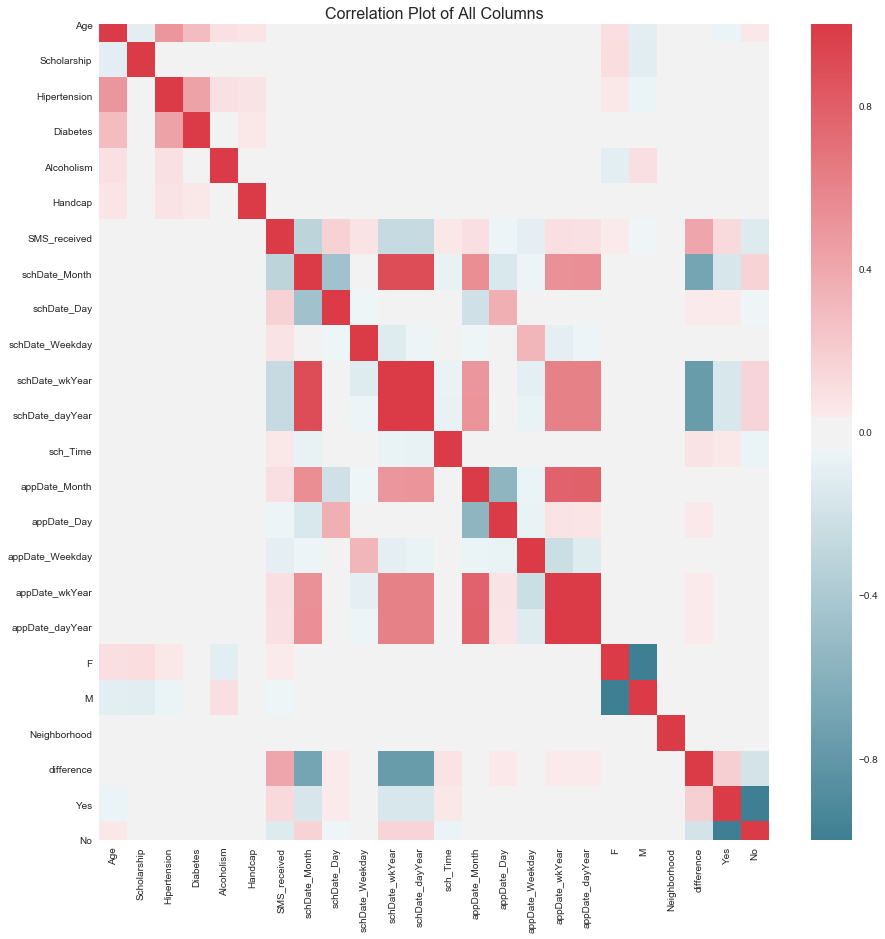

In [45]:
#Check for correlation first
fig, (ax1) = plt.subplots(ncols=1, figsize=(15,15))
ax1.set_title('Correlation Plot of All Columns', fontdict = {'fontsize' : 16})
corr_df = pd.concat([X, diff_df2['Yes'], diff_df2['No']], axis = 1)
corr = corr_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
           cmap=sns.diverging_palette(220, 10, as_cmap=True))

<a id='dg'></a>
#### Dendogram

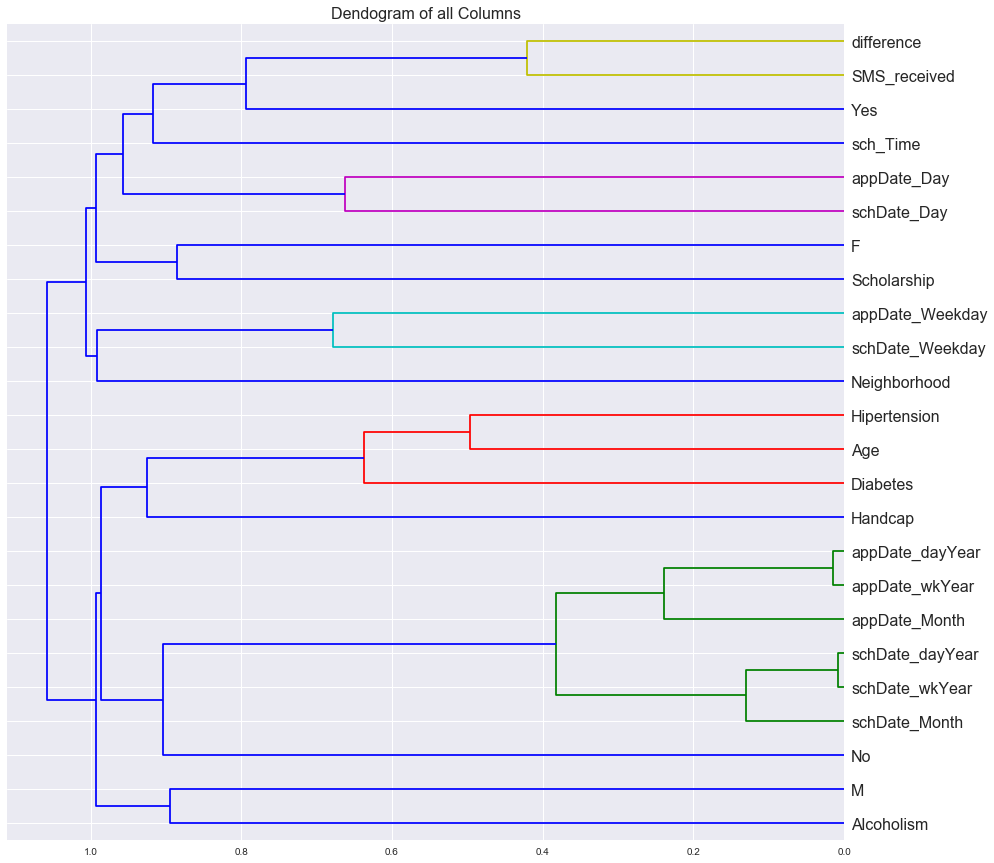

In [46]:
#Dendogram of correlation
from scipy.cluster import hierarchy as hc

corr = np.round(sp.stats.spearmanr(corr_df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig, (ax1) = plt.subplots(ncols=1, figsize=(15,15))
#fig = plt.figure(figsize=(16,16))
ax1.set_title('Dendogram of all Columns', fontdict = {'fontsize' : 16})
dendrogram = hc.dendrogram(z, labels=corr_df.columns, orientation='left', leaf_font_size=16)
plt.show()

#### Model Data
> scikit learn's random forest classififier was chosen because of easy interpretation of the results and the factors leading to the results
>

In [47]:
#70/30 train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=SEED)
print( X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(80268, 22) (26757, 22) (80268,) (26757,)


In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc_m = RandomForestClassifier(n_estimators=300,
                               criterion = 'entropy',
                               max_features = 'auto',
                               bootstrap = True, 
                               verbose = False,
                               n_jobs = 6,
                               random_state=SEED)


In [49]:
#Fit classifier, then predict
from sklearn.metrics import classification_report

rfc_m.fit(X_train, y_train)
rfc_pred = rfc_m.predict(X_val)

#report of results
print(classification_report(y_val, rfc_pred))

              precision    recall  f1-score   support

          No       0.81      0.95      0.88     21313
         Yes       0.42      0.15      0.22      5444

    accuracy                           0.78     26757
   macro avg       0.61      0.55      0.55     26757
weighted avg       0.73      0.78      0.74     26757



In [50]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_val, rfc_pred).ravel()
total_val = len(y_val)
all_y = len(y_val[y_val == 'Yes'])
per_tp = round(tp/all_y, 3) *100

print('True Positive:  {}\nFalse Positive: {}\nTrue Negative:  {}\nFalse Negative: {}\n\nTotal: {}\nPercent True Positive: {}%'
      .format(tp, fp, tn, fn, total_val, per_tp))

True Positive:  793
False Positive: 1115
True Negative:  20198
False Negative: 4651

Total: 26757
Percent True Positive: 14.6%


<a id='cm'></a>
#### Above: Confusion matrix results
#### Below: Normalized confusion matrix graph showing catagorical percents

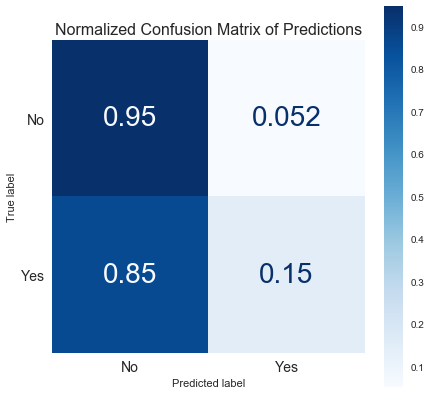

In [51]:
fig, (ax3) = plt.subplots(ncols=1, figsize=(7,7))
ax3.set_title('Normalized Confusion Matrix of Predictions', fontdict = {'fontsize' : 16})
plt.rcParams.update({'font.size': 28})
ax3.grid(False)
plt.tick_params(labelsize=14)
plot_confusion_matrix(rfc_m, X_val, y_val, values_format = '1g', normalize = 'true',ax = ax3, cmap = plt.cm.Blues)

In [52]:
#Functions to plot feature importance
def plot_fi(fi, titl):
    return fi.plot('cols', 'imp', 'barh', figsize = (12,12), legend = False).set_title(titl, fontdict = {'fontsize' : 16})

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=True)

In [53]:
fi = rf_feat_importance(rfc_m, X)

<a id='rfr'></a>
#### Random Forest Results

Text(0.5, 1.0, 'Feature Importance for Random Forest Model')

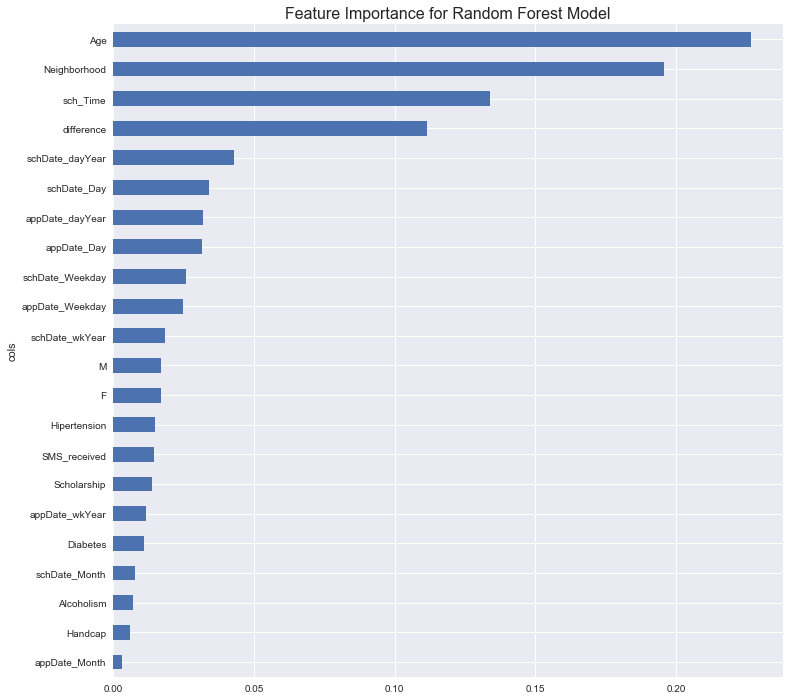

In [54]:
plot_fi(fi, 'Feature Importance for Random Forest Model')

<a id='f2'></a>
#### Findings Question 2
>In the <a href="#cp">correlation plot</a> several interesting correlations are observed. The first intereting correlation 
>is the positive correlation between the difference in days and being a no-show combined with a negative correlation between
>difference in days and showing up to an appointment. This is in line with the results of the first question. The same positive 
>negative correlation can be seen with the SMS_received column. 
>
>The <a href="#dg">dendogram</a> also shows a close correlation between being a no-show and difference and
>SMS_received. 
>
>The <a href="#rfr">random forest classifier</a> showed age, neighborhood, schedule-time, and difference as the primary 
>factors in its decisions. A quick look at the <a href="#cm">confusion matrix</a> shows that the model only predicted 
>14.6% of the no-shows correctly. The precision, recall, and F1 scorees were also very low for the no-show group.
>
>The one factor that was present in all three tests was the difference in days between scheduling an appointment and the day of
>the appointment.

<a id='conclusions'></a>
## Conclusions

>In <a href="#q1">Research Question 1</a> it was shown, with statistically significant evidence, that there is a high probability of same-day appointments showing up and a steep drop off for any
>appointment that was not made the same day. In <a href="#q2">Research Question 2</a> the only column that correlated with show/no-show in all three tests 
>was the difference in days between scheduling an appointment and the day of the appointment. It is important to note that none 
>of these tests found a significant correlation. 
>
>In summary, the only statistically significant evidence we were able to find
>about this dataset 
>is that same-day appointments are likely to show up.

### Limitations
>The primary limitation of this project was the lack of relevant data. As is, the data only contained some weak correlations to 
>no-shows and feature engineering was required to find any relevant evidence. There was some erroneous data, such as
> appointments made after the appointment itself, that required feature engineering to uncover and could have potentialy
>altered the outcome of the analysis. 
>Further feature engineering could possibly reveal more insights. Some variables that could
>help in the analysis are: type of transportation, employment status, family size, income, and distance from hospital.

<a id='ref'></a>
### References

>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
>
>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix